

#Brief example of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([8,5,3,7,9,3,1]))

# 1. Linear Classifier

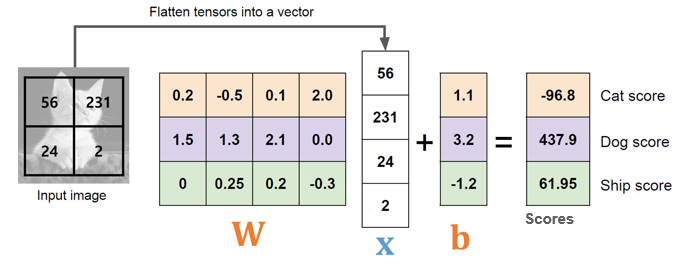

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# parameter setting

num_size = 4
num_class = 3

In [ ]:
# the number of sample = 1

num_sample = 1

# y = Wx + b

x = np.random.randint(255, size = (num_size, num_sample)) # Input (size 4 x 1)
W = np.random.normal(0, 1, size = (num_class, num_size)) # Weights (size 3 x 4)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 3 x 1)

s = np.dot(W, x) + b # Score (size 3x1)

In [ ]:
print(x, '<-- x')
print(W, '<-- W')
print(b, '<-- b')
print(s, '<-- s')

### 2.2. 2D image case 

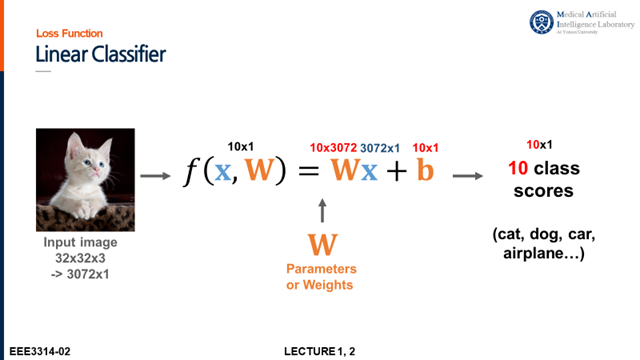

In [ ]:
# parameter setting

img_shape = [32, 32, 3]
img_size = img_shape[0]*img_shape[1]*img_shape[2]
num_class = 10

x_image = np.random.randint(255, size = img_shape) # Input (size 32 x 32 x 3)

print('image shape:', x_image.shape)
plt.imshow(x_image)
plt.show()

In [ ]:
# 1 sample case

num_sample = 1

# y = Wx + b

#아래 -1에 3072를 넣어도 같은 의미
x = np.reshape(x_image, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1, size = (num_class, img_size)) # Weights (size 10 x 3072)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

#### 2.3 Multi-sample case

In [ ]:
# parameter setting

num_size = 4
num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 1, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1000)

In [ ]:
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

### Assignment 1-1
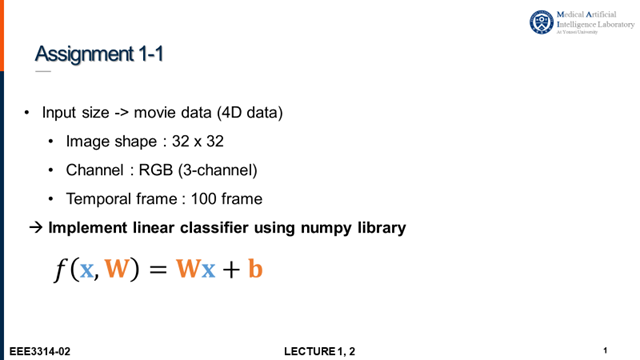

In [ ]:
# 여기에 Assignment 1-1 code 작성
import numpy as np

# parameter setting
mov_shape = [32, 32, 3, 100]
mov_size = mov_shape[0]*mov_shape[1]*mov_shape[2]*mov_shape[3]
num_class = 10

x_movie = np.random.randint(255, size = mov_shape) # Input (size 32 x 32 x 3 x 100)

# 1 sample case

num_sample = 1

# y = Wx + b

x = np.reshape(x_movie, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1, size = (num_class, mov_size)) # Weights (size 10 x 3072)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
# check shapes of parameters (input, weights, bias, score)
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

#2. Loss Function 
### 2.1 Softmax loss
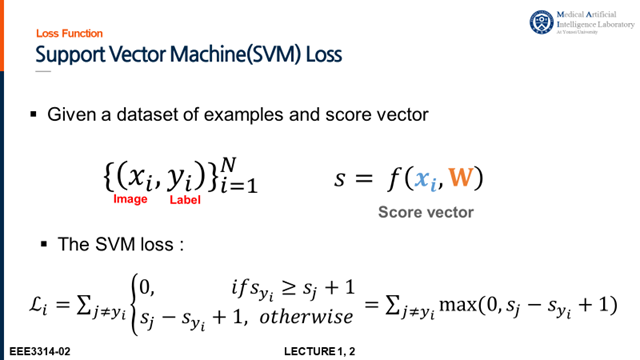

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_size = 4
num_class = 3
num_sample = 1

# y = Wx + b

x = np.random.randint(255, size = (num_size, num_sample)) # Input (size 4 x 1)
W = np.random.normal(0, 1, size = (num_class, num_size))/50 # Weights (size 3 x 4)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 3 x 1)

s = np.dot(W, x) + b # Score (size 3x1)

In [ ]:
y = np.array([1, 0, 0])[..., np.newaxis] # label
print(s, '<-- score')
print(y, '<-- label')

In [ ]:
def Loss_SVM(s, y):
    delta = 1.0
    [num_class, num_sample] = s.shape
    Li = 0
    for i in range(num_sample):
        ysample = y[:,i] # true label
        ssample = s[:,i] # s[0]이 true label
        ysample_index = np.where(ysample==1)[0][0]
        for j in range(num_class):
            if j == ysample_index:
                continue
            else:
                Li += max(0, ssample[j] - ssample[ysample_index] + delta)
    return Li / num_sample

In [ ]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss)

#### 2.2 image case

In [ ]:
# 1 sample image case

img_shape = [32, 32, 3]
img_size = img_shape[0]*img_shape[1]*img_shape[2]
num_class = 10

x_image = np.random.randint(255, size = img_shape) # Input (size 32 x 32 x 3)

print('image shape:', x_image.shape)
plt.imshow(x_image)
plt.show()

num_sample = 1

# y = Wx + b

x = np.reshape(x_image, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1e-3, size = (num_class, img_size)) # Weights (size 10 x 3072)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])[..., np.newaxis] # label
print(s, '<-- score')
print(y, '<-- label')

In [ ]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss)

#### 2.3 Sanity Check

In [ ]:
# 1 sample image case

img_shape = [32, 32, 3]
img_size = img_shape[0]*img_shape[1]*img_shape[2]
num_class = 10

x_image = np.random.randint(255, size = img_shape) # Input (size 32 x 32 x 3)

num_sample = 1

# y = Wx + b

x = np.reshape(x_image, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1e-8, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1e-8, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])[..., np.newaxis] # label
print(s, '<-- score')
print(y, '<-- label')

In [ ]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss) # Class - 1

#### 2.4 Multi-sample *case*

In [ ]:
# parameter setting

num_size = 4
num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 1, size = (num_class, img_size))/1000 # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

In [ ]:
y = np.zeros(s.shape)
y_index = np.random.randint(10, size = num_sample) 

for idx in range(num_sample):
    y[y_index[idx], idx] = 1    

In [ ]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss) 

In [ ]:
# Sanity Check

num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 1e-8, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1e-8, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss) # Class - 1

#### 2.5 Regularization

In [ ]:
def Loss_reg(W, dim=2):
    if dim == 1: # L1 regularization:
        reg = np.sum(abs(W))
    elif dim == 2:
        print('assignment')

    return reg

In [ ]:
# parameter setting

num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 0.001, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [ ]:
loss_term = Loss_SVM(s, y)
reg_term_r1 = Loss_reg(W, dim=1)
print('loss_term :', loss_term) 
print('r1_regularization :', reg_term_r1) 
print('total loss :', loss_term + reg_term_r1)

### Assignment 1-2
1) L2 Regularization 구현해보기

2) 주어진 MNIST dataset을 이용하여 SVM loss와 Regularization loss를 구하기

3) Total loss 구해보기


In [ ]:
########## L2 Regularization 과제는 여기에 ###################
# L2 Regularization 
def Loss_reg(W, dim=2):
    if dim == 1: # L1 regularization:
        reg = np.sum(abs(W))
    elif dim == 2:
        print('implement L2 regularization')

    return reg

In [ ]:
import sklearn.datasets
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

num_sample = 5000
num_class = 10

x = mnist.data[:num_sample]
img_size = x[0].size
y_index = mnist.target[:num_sample]

y = np.zeros((num_class, num_sample))
for idx in range(num_sample):
    y[int(y_index[idx]), idx] = 1    

In [ ]:
fig, axes = plt.subplots(2, 4, constrained_layout=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(1 - x[i].reshape((28, 28)), cmap="gray", vmin=0, vmax=1)
    ax.set(title=f"{y_index[i]}")
    ax.set_axis_off()

In [ ]:
#implement your code

In [ ]:
!nvidia-smi

# Pytorch Tutorial
참고
https://tutorials.pytorch.kr/beginner/deep_learning_60min_blitz.html